In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Создать приложение, которое будет из готового файла с данными «Сбербанка» выводить результат по параметрам:
    - Тип данных
    - Интервал дат
    - Область
2. Визуализировать выводимые данные с помощью графика

In [2]:
df = pd.read_csv('opendata.csv', encoding = 'windows-1251')
df_type = df.groupby(['name'], as_index=False).agg({'region':'max'})
df_region = df.groupby(['region'], as_index=False).agg({'name':'max'})

In [3]:
print(df_type['name'])
type_int = int(input('Выбирите тип данных:'))

0             В среднем депозитов в руб. на человека
1        В среднем руб. на текущем счете на человека
2             Количество заявок на ипотечные кредиты
3       Количество заявок на потребительские кредиты
4                         Количество новых депозитов
5                          Средние расходы по картам
6                          Средние траты в ресторане
7                  Средние траты в ресторане фастфуд
8                     Средний чек в формате Ресторан
9                      Средний чек в формате Фастфуд
10                                  Средняя зарплата
11                                    Средняя пенсия
12          Средняя сумма заявки на ипотечный кредит
13    Средняя сумма заявки на потребительский кредит
14                     Средняя сумма нового депозита
Name: name, dtype: object
Выбирите тип данных:2


In [4]:
print(df_region['region'])
region_int = int(input('Выбирите регион:'))

0                               Алтайский край
1                             Амурская область
2                        Архангельская область
3                         Астраханская область
4                         Белгородская область
5                             Брянская область
6                         Владимирская область
7                        Волгоградская область
8                          Вологодская область
9                          Воронежская область
10                Еврейская автономная область
11                          Забайкальский край
12                          Ивановская область
13                           Иркутская область
14             Кабардино-Балкарская Республика
15                     Калининградская область
16                           Калужская область
17                             Камчатский край
18                         Кемеровская область
19                           Кировская область
20                         Костромская область
21           

In [5]:
print('Введите желаемый диапазон дат в формате(yyyy-mm-dd):')
date_from = input('с :')
date_to = input('по :')

Введите желаемый диапазон дат в формате(yyyy-mm-dd):
с :2014-01-01
по :2014-12-31


In [6]:
df_user = df.query("name == '" + df_type['name'][type_int]
                   + "' and region == '" + df_region['region'][region_int] 
                   + "' and date >= '" + date_from 
                   + "' and date <= '" + date_to + "'")

In [7]:
df_user

,name,region,date,value
17531,Количество заявок на ипотечные кредиты,Тульская область,2014-01-15,721
17532,Количество заявок на ипотечные кредиты,Тульская область,2014-02-15,970
17533,Количество заявок на ипотечные кредиты,Тульская область,2014-03-15,1089
17534,Количество заявок на ипотечные кредиты,Тульская область,2014-04-15,1154
17535,Количество заявок на ипотечные кредиты,Тульская область,2014-05-15,1065
17536,Количество заявок на ипотечные кредиты,Тульская область,2014-06-15,1131
17537,Количество заявок на ипотечные кредиты,Тульская область,2014-07-15,1002
17538,Количество заявок на ипотечные кредиты,Тульская область,2014-08-15,1074
17539,Количество заявок на ипотечные кредиты,Тульская область,2014-09-15,1266
17540,Количество заявок на ипотечные кредиты,Тульская область,2014-10-15,1379


/home/aleksandr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/aleksandr/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


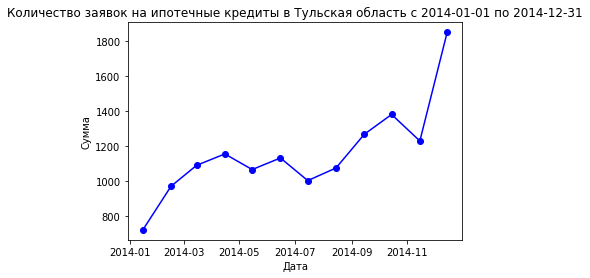

In [8]:
df_user['date'] = pd.to_datetime(df_user['date'], format='%Y-%m-%d')
plt.title(df_type['name'][type_int] + ' в ' 
          + df_region['region'][region_int] 
          + ' с ' + date_from 
          + ' по ' + date_to)
plt.xlabel("Дата")
plt.ylabel("Сумма")
plt.plot(df_user['date'], df_user['value'], 'bo-')